Based on a exercsie file from linkedinlearning.com

## K-means method
### Setting up for clustering analysis

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
%matplotlib inline

Loading Iris dataset, a famous dataset being used for clustering tutorials. More information: https://archive.ics.uci.edu/ml/datasets/iris

In [4]:
# loading
iris = datasets.load_iris()

from sklearn.preprocessing import scale
X = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[0:10,]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

## Building and running your model

In [6]:
clustering  = KMeans(n_clusters=3,random_state=5)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

## Plotting your model outputs

In [0]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_length','Sepal_width','Petal_lenght','Petal_width']
y.columns = ['Targets']

Text(0.5, 1.0, 'K-Means Classification')

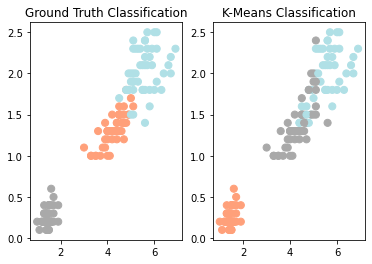

In [12]:
color_theme = np.array(['darkgray','lightsalmon','powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_lenght,y=iris_df.Petal_width,c=color_theme[iris.target],s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_lenght,y=iris_df.Petal_width,c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification')

Text(0.5, 1.0, 'K-Means Classification')

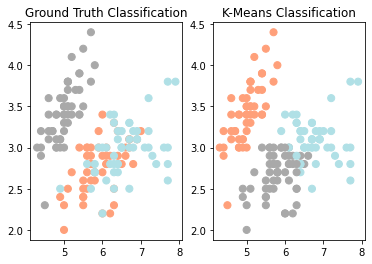

In [14]:
color_theme = np.array(['darkgray','lightsalmon','powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Sepal_length,y=iris_df.Sepal_width,c=color_theme[iris.target],s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Sepal_length,y=iris_df.Sepal_width,c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification')

## How to find the optimal number of clusters?

Elbow method is the most common method for determining the appropriate number of clusters. "One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data" (Wikipedia)

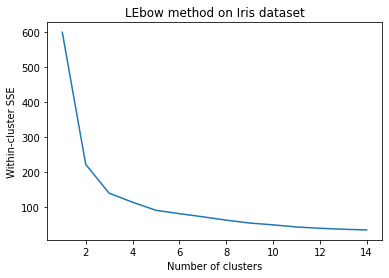

In [19]:
#Elbow method
distortations = {}
for k in range(1,15):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  distortations[k] = kmeans.inertia_

plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Iris dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

As shown in the graph, the appropiate number of clusters is either 2 or 3.

## Hierarchical Clustering & Dendrogram

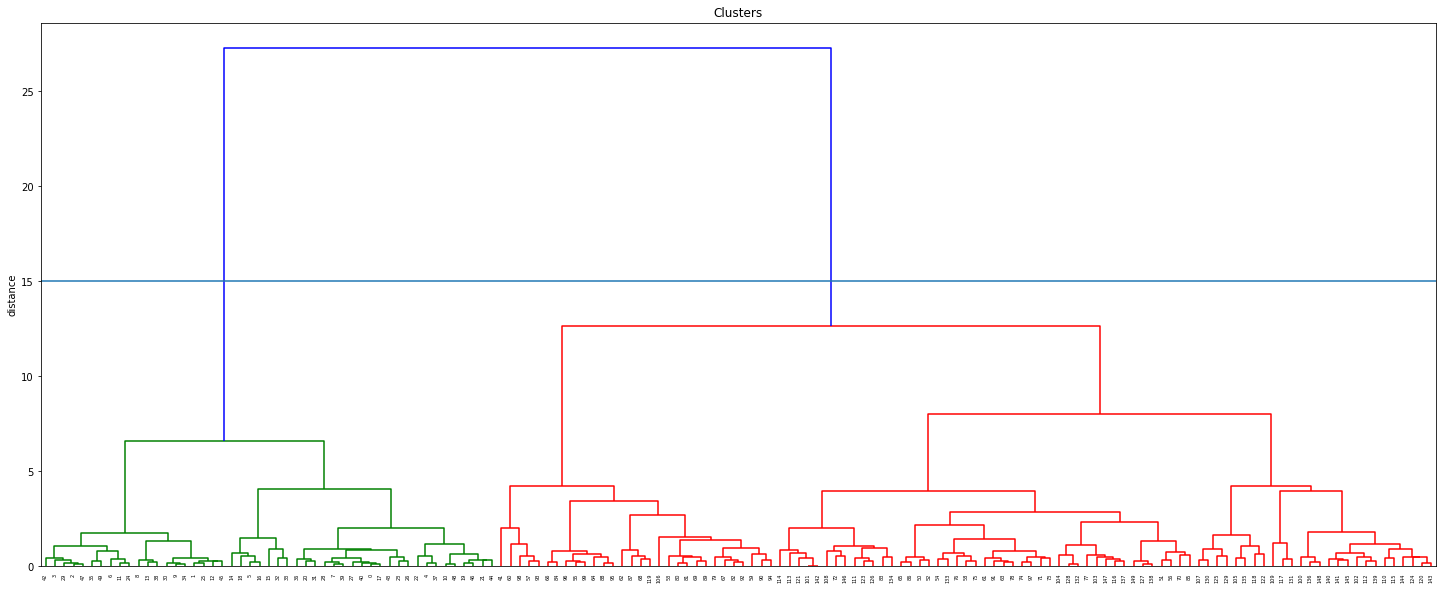

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X,'ward')

plt.figure(figsize=(25,10))
plt.title('Clusters')
plt.ylabel('distance')
dendrogram(Z)

plt.axhline(y=15)
plt.show()